# Przewidywanie ceny domów. Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny domu o podanych cechach.¶

# Opis danych : http://web.stanford.edu/class/stats191/data/amesdoc.txt¶

In [1]:
#Import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_columns', None)
from scipy import stats
import matplotlib.gridspec as gridspec 
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statistics

# CZĘŚĆ 1 - ANALIZA DANYCH

In [2]:
#W pierwszej części zajmiemy się pozananiem danych. Zaczniemy od przecztania dokumentacji, następnie wcytujemy dane i sprawdzamy co się w nich dokładnie znajduje.

In [3]:
#Przypisz i przechowaj dane w formacie DataFrame do zmiennej 'data'
data = pd.read_csv("ames2000_NAfix.csv")

In [4]:
#Wyświetl 10 pierwszych rekordów
print('Reprezentacja wczytanych danych:')
data.head(10)

Reprezentacja wczytanych danych:


,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,1302,0,0,1302,1,0,1,1,1,1,Gd,5,Typ,1,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,110,50,0,0,0,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,None,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,8,1972,2003,Gable,CompShg,WdShing,HdBoard,None,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,768,0,0,768,0,1,1,0,2,1,TA,5,Typ,0,None,Detchd,1974,Fin,1,396,TA,TA,Y,192,0,0,0,0,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,None,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,1249,1347,0,2596,0,0,3,1,4,1,Gd,9,Typ,0,None,Attchd,2006,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,None,None,None,0,9,2006,New,Partial,342643
5,20,RL,50,4280,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,9,1946,2001,Gable,CompShg,MetalSd,MetalSd,None,0,TA,Gd,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560,GasA,Ex,Y,FuseA,704,0,0,704,0,1,1,0,2,1,Fa,4,Typ,0,None,CarPort,1946,Unf,1,220,TA,TA,Y,0,0,24,0,0,0,None,None,None,0,9,2009,WD,Normal,88750
6,20,RL,155,20064,Pave,None,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,8,6,1976,1976,Shed,WdShngl,Wd Sdng,Wd Sdng,None,0,Gd,TA,CBlock,Gd,Gd,Gd,LwQ,51,GLQ,915,0,966,GasA,Ex,Y,SBrkr,1743,0,0,1743,2,0,0,1,0,1,Gd,5,Typ,2,Fa,Attchd,1976,Fin,2,529,TA,TA,Y,646,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,279000
7,20,RM,60,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,576,576,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1952,RFn,1,528,TA,TA,Y,0,0,0,0,115,0,None,None,None,0,8,2006,COD,Normal,105000
8,20,RL,70,9100,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,244,Gd,TA,PConc,Gd,TA,Av,GLQ,1400,Unf,0,125,1525,GasA,Ex,Y,SBrkr,1525,0,0,1525,1,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2000,RFn,2,541,TA,TA,Y,219,36,0,0,0,0,None,None,None,0,9,2006,WD,Normal,235000
9,70,C (all),None,6449,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,4,1,1907,1950,Gambrel,CompShg,Wd Sdng,Stucco,None,0,TA,TA,CBlock,TA,TA,No,Rec,7

In [5]:
#Wyświetl informacje dotyczące zmiennej typu DataFrame o nazwie 'data'
print('Informacje o zbiorze :') 
print(data.info())

Informacje o zbiorze :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MS.SubClass      2000 non-null   int64 
 1   MS.Zoning        2000 non-null   object
 2   Lot.Frontage     2000 non-null   object
 3   Lot.Area         2000 non-null   int64 
 4   Street           2000 non-null   object
 5   Alley            2000 non-null   object
 6   Lot.Shape        2000 non-null   object
 7   Land.Contour     2000 non-null   object
 8   Utilities        2000 non-null   object
 9   Lot.Config       2000 non-null   object
 10  Land.Slope       2000 non-null   object
 11  Neighborhood     2000 non-null   object
 12  Condition.1      2000 non-null   object
 13  Condition.2      2000 non-null   object
 14  Bldg.Type        2000 non-null   object
 15  House.Style      2000 non-null   object
 16  Overall.Qual     2000 non-null   int64 
 17  Overall.Co

In [6]:
#Wyświetliliśmy podstawowe informacje o danych, ile mamy zmiennych, ile jest obserwacji i jakie mamy typy kolumn.

In [7]:
#Wyświetl ilość rzędów i kolumn
print(data.shape)

(2000, 80)


In [8]:
#Wyświetl brakujące wartości
features_with_na=[features for features in data.columns if data[features].isnull().sum()]
print('Brakujące wartości dla: ', features_with_na) 

Brakujące wartości dla:  ['Mas.Vnr.Type', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond']


In [9]:
#Brakujące wartości w tych kolumnach będziemy musieli później zastąpić.

In [10]:
#Sprawdzenie skośności
from scipy.stats import skew
print("Skewness of the SalesPrice is", data['SalePrice'].skew())

Skewness of the SalesPrice is 1.73845263948706


In [11]:
#Skośność jest miarą asymetrii obserwowanych wyników. Informuje nas o tym jak wyniki dla danej zmiennej kształtują się wokół średniej.
#Innymi słowy, czy w naszym zbiorze obserwacji więcej jest wyników, które są niższe niż średnia dla całej grupy, wyższe czy równe średniej.
#Współczynnik skośności powyżej 0 tak jak w naszym przypadku świadczy o prawostronnej asymetrii rozkładu (inaczej nazywanym rozkładem dodatnio skośnym) - większość domów została sprzedana po cenie niższej od średniej. 

c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\basia\appdata\local\programs\pyth

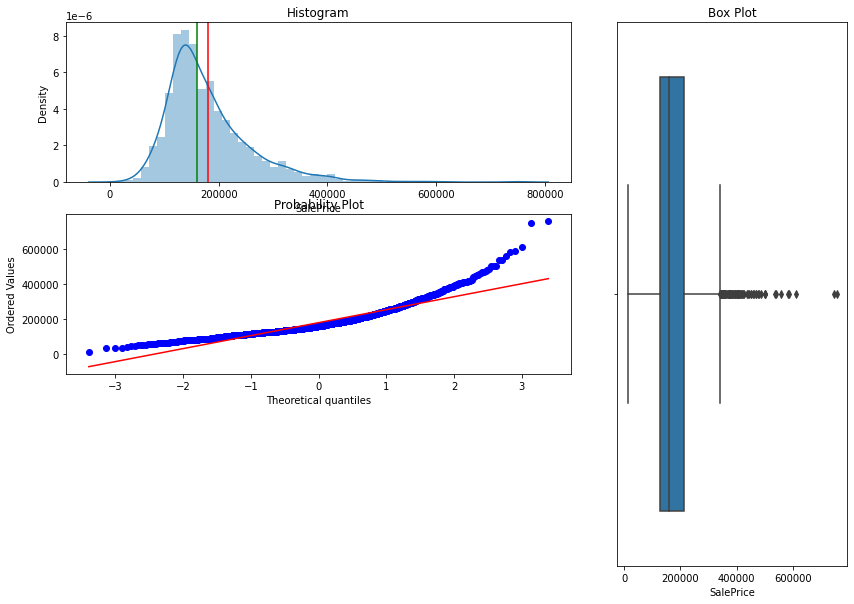

In [12]:
#Wyświetlamy histogram, boxplt i probability plot
def three_chart_plot(data, feature):
    fig = plt.figure(constrained_layout = True, figsize = (14, 10))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(data.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = data[feature].mean(), c = 'red')
    plt.axvline(x = data[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(data.loc[:,feature], plot = ax2)

   
    ax3 = fig.add_subplot(grid[:, 2]) 
    ax3.set_title('Box Plot')
    sns.boxplot(data.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(data, 'SalePrice')

In [13]:
#Zbiór danych zawiera szereg wartości odstających. 
#Na wykresie prawdopodobieństwa czerwona linia przedstawia te punkty, które zostałyby wykreślone dla punktów na osi y, gdyby miały one rozkład normalny. 
#Niebieskie punkty reprezentują rzeczywisty scenariusz. Widzimy, że na obu końcach jest dużo odchyleń, czyli w prawym górnym i lewym dolnym rogu.

In [14]:
#Stwórz zmienną numerical_features i przypisz do niej zmienne numeryczne
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'object'] #typ różny od obiektu
print('Liczba zmiennych numerycznych: ', len(numerical_features)) #wyświetl liczbę
data[numerical_features].head()

Liczba zmiennych numerycznych:  26


,MS.SubClass,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
0,120,3901,6,5,2005,2006,1302,0,0,1302,1,1,1,1,5,1,110,50,0,0,0,0,0,8,2007,204000
1,20,8400,4,5,1970,1970,882,0,0,882,1,0,2,1,4,0,240,0,0,0,0,0,0,4,2010,126000
2,85,7200,5,8,1972,2003,768,0,0,768,1,0,2,1,5,0,192,0,0,0,0,0,0,4,2009,133900
3,90,7018,5,5,1979,1979,1535,0,0,1535,2,0,4,2,8,0,0,0,0,0,0,0,0,6,2009,118858
4,60,16259,9,5,2006,2006,1249,1347,0,2596,3,1,4,1,9,0,240,154,0,0,0,0,0,9,2006,342643


In [15]:
#Liczba zmiennych numerycznych w naszym zbiorze to 26, jednak widać, że niektóre z nich prezentują informacje dotyczące roku,
#wyświetlmy te zmienne - jako warunek weźmiemy nazwę kolumny która wskazuje na rok - w nazwie pojawia się słowo 'Year' i 'Yr'.
#Jest też jedna zmienna która wskazuje na miesiąc - Mo.Sold, ale nie bierzemy jej pod uwagę.

In [16]:
#Stwórz kategorię year_future i przypisz do niej zmienne odnoszące się do roku
year_feature = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]
year_feature

['Year.Built', 'Year.Remod.Add', 'Yr.Sold']

In [17]:
#Mamy 3 zmienne które identyfikujemy jako rok, sprawdźmy jakie mają wartości.

In [18]:
#Wyświelt unikalne wartości dla zmiennych year_feature
for feature in year_feature:
    print(feature, data[feature].unique())

Year.Built [2005 1970 1972 1979 2006 1946 1976 1950 2000 1907 1918 1967 1931 1978
 1964 1958 2004 2007 1941 1954 2002 1959 1977 1998 1935 1984 1910 1965
 1960 1924 1966 1892 1988 1962 1929 1991 1956 1987 1975 2008 1996 1949
 1974 1900 1920 1955 1936 2001 1999 1928 1925 1981 1926 1993 1923 1992
 1947 1963 1922 1938 1961 2009 1968 1930 1971 1995 2003 1948 1997 1952
 1945 1921 1940 1872 1957 1985 1953 1937 1973 1880 1951 1990 1939 1983
 1980 1914 1919 1969 1895 1994 1890 1915 1916 1905 1942 1989 1908 1912
 1902 1986 2010 1917 1934 1927 1885 1879 1901 1932 1904 1982 1896 1911]
Year.Remod.Add [2006 1970 2003 1979 2001 1976 1950 2000 1998 1967 1978 1964 2004 2007
 2005 1954 2002 1959 1977 1984 1981 1987 1973 1988 1966 1965 1985 1990
 1992 1956 2008 1997 1974 1993 1955 1980 1972 1975 1994 1960 1963 1999
 1961 1962 2009 1968 1971 1995 1996 1952 1958 1957 1953 1986 1951 1991
 1983 2010 1989 1969 1982]
Yr.Sold [2007 2010 2009 2006 2008]


Text(0.5, 1.0, 'Cena domu a rok budowy')

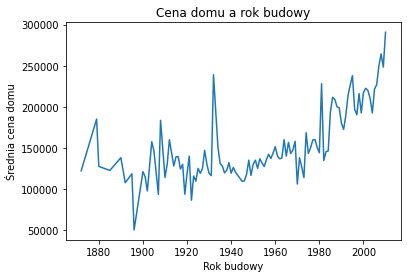

In [19]:
#Wyświelt korelację z Sale Price dla Year.Built
data.groupby('Year.Built')['SalePrice'].median().plot()
plt.xlabel('Rok budowy')
plt.ylabel('Średnia cena domu')
plt.title("Cena domu a rok budowy")

Text(0.5, 1.0, 'Cena domu a rok renowacji')

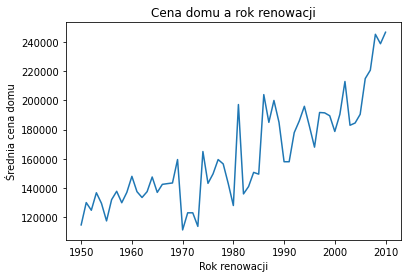

In [20]:
#Wyświelt korelację z Sale Price dla Year.Remod.Add
data.groupby('Year.Remod.Add')['SalePrice'].median().plot()
plt.xlabel('Rok renowacji')
plt.ylabel('Średnia cena domu')
plt.title("Cena domu a rok renowacji")

Text(0.5, 1.0, 'Cena domu a rok sprzedaży')

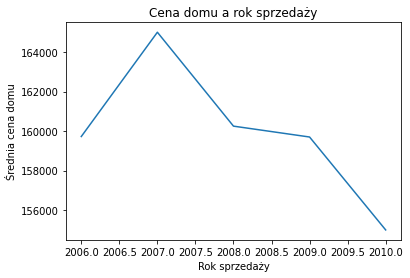

In [21]:
data.groupby('Yr.Sold')['SalePrice'].median().plot()
plt.xlabel('Rok sprzedaży')
plt.ylabel('Średnia cena domu')
plt.title("Cena domu a rok sprzedaży")

In [22]:
#Rok budowy i rok renowacji zachowują się tak jak w rzeczywistości czyli im bliższy bieżącej dacie tym cena jest wyższa.
#Średnia cena domu znacznie spada po 2007 roku.

In [23]:
#Stwórz kategorię wartości numerycznych dla których wielkość wartości unikalnych nie będzie większa niż 25
#Zmienne dyskretne to zmienne numeryczne, które mają policzalną liczbę wartości między dowolnymi dwiema wartościami. Zmienna dyskretna jest zawsze numeryczna.
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature]

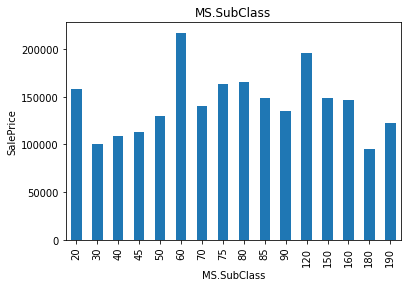

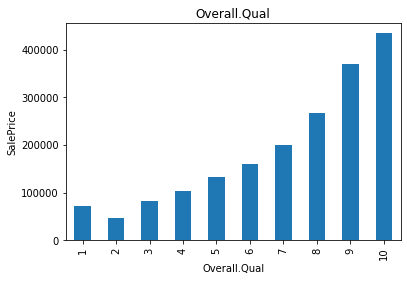

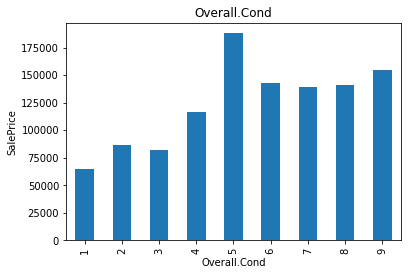

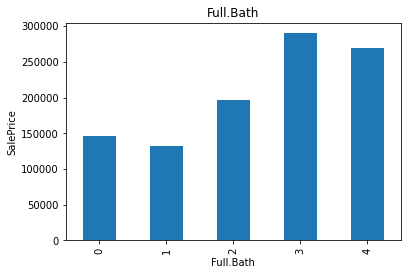

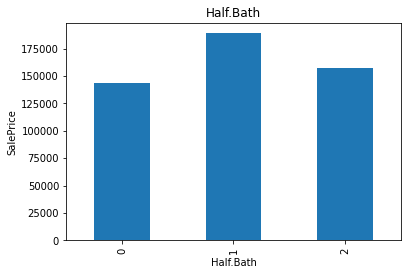

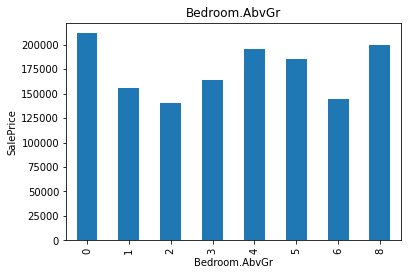

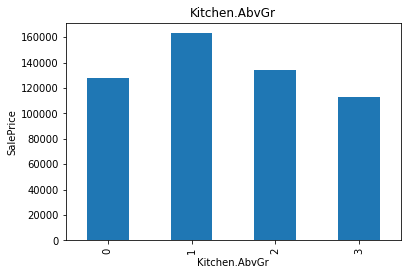

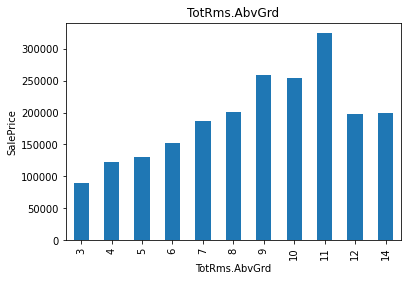

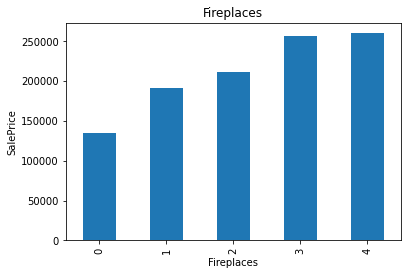

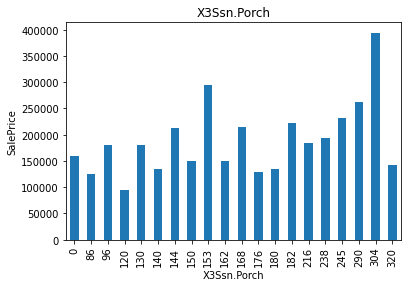

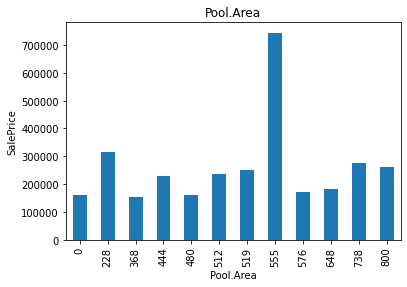

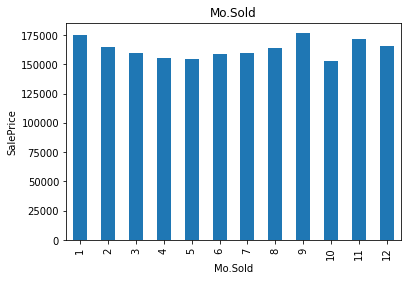

In [24]:
#Wyświetl porówananie kategorii zgrupowanych w discrete_feature z SalePrice
for feature in discrete_feature:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [25]:
#MS.SubClass - dla wartości 60 i 120 cena jesta najwyższa
#Overall.Qual - im większa ocena tym wyższa cena
#Overall.Cond - nie ma za dużej zależności.
#Full.Bath - cena rośnie wraz z ilością, ale po 3 spada
#Half.Bath - nie ma za dużej zależności
#Bedroom.AbvGr - nie ma dużej zależności
#Kitchen.AbvGr - nie ma dużej zależności
#TotRms.AbvGrd - nie ma dużej zależności
#Fireplaces - ilość rośnie to cena rośnie
#Pool.Area - nie ma dużej zależności, tylko jedno się znacznie wyróżnia
#Mo.Sold - nie ma zależności

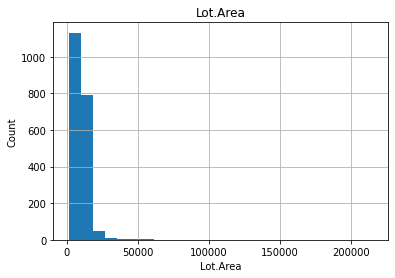

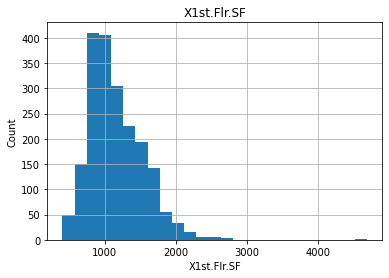

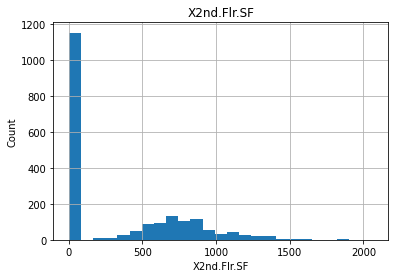

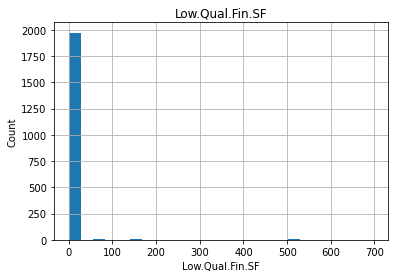

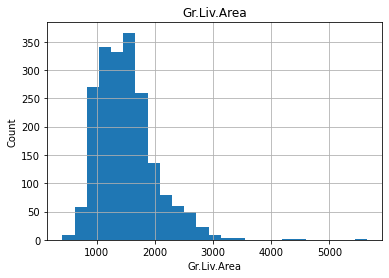

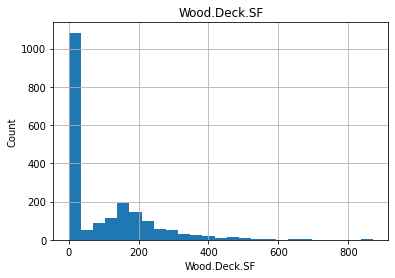

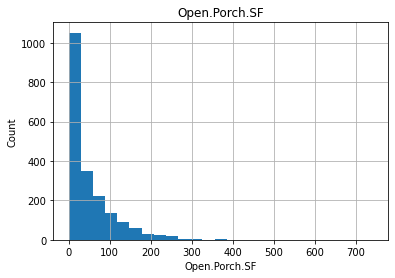

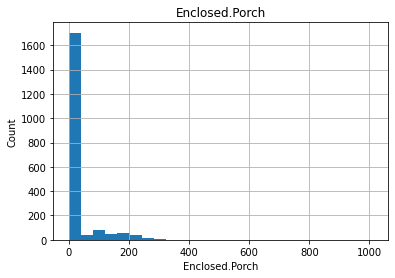

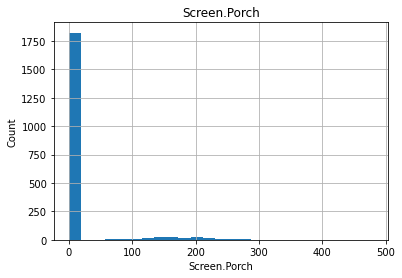

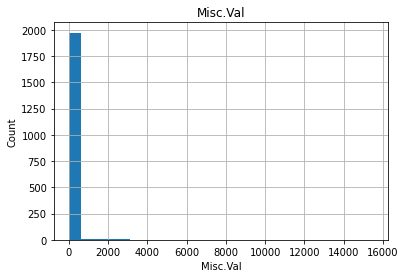

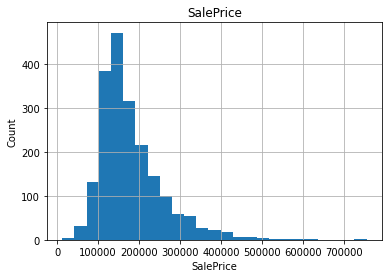

In [26]:
#Stwórz kategorię wartości numerycznych dla których wielkość wartości unikalnych będzie większa niż 20
#Zmienne ciągłe to zmienne numeryczne, które mają nieskończoną liczbę wartości między dowolnymi dwiema wartościami. Zmienna ciągła może mieć postać numeryczną lub datę / godzinę.
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature] # z wyłączeniem discrete_feature i year_feature
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [27]:
#Widzimy, że tutaj będzie potrzebna normalizacja danych dla niektórych zmiennych.

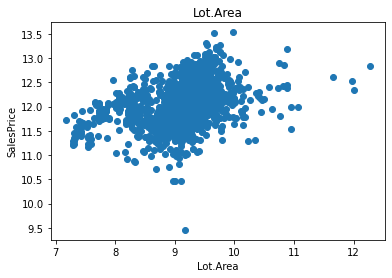

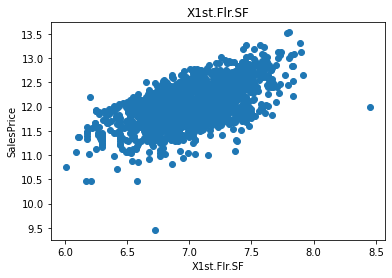

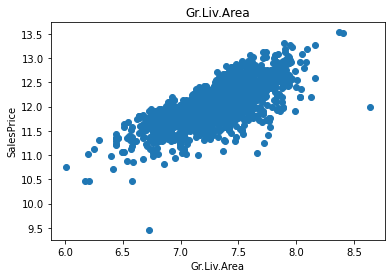

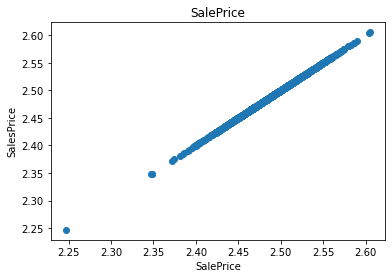

In [28]:
#Użyj transormacji logarytmicznej dla continuous_feature
for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset['SalePrice']=np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

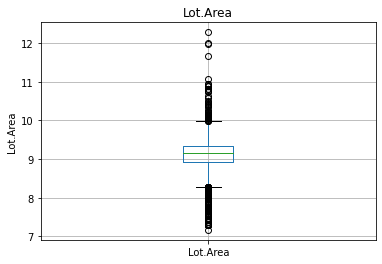

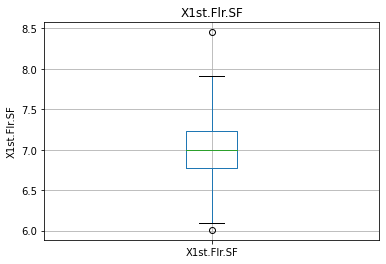

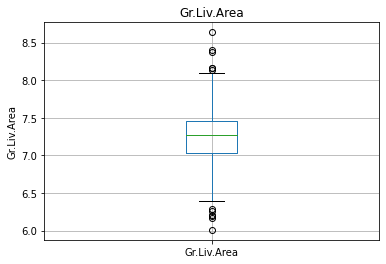

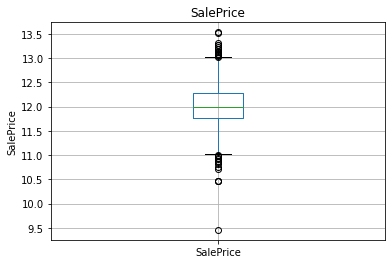

In [29]:
#Wyświetl wartości odstające
for feature in continuous_feature:
    dataset = data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [30]:
#Stwórz kategorię categorical_features i przypisz do niej zmienne obiektowe
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='object'] 
#Wyświetl te zmienne
categorical_features

['MS.Zoning',
 'Lot.Frontage',
 'Street',
 'Alley',
 'Lot.Shape',
 'Land.Contour',
 'Utilities',
 'Lot.Config',
 'Land.Slope',
 'Neighborhood',
 'Condition.1',
 'Condition.2',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',
 'Mas.Vnr.Type',
 'Mas.Vnr.Area',
 'Exter.Qual',
 'Exter.Cond',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.SF.1',
 'BsmtFin.Type.2',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'Heating',
 'Heating.QC',
 'Central.Air',
 'Electrical',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Kitchen.Qual',
 'Functional',
 'Fireplace.Qu',
 'Garage.Type',
 'Garage.Yr.Blt',
 'Garage.Finish',
 'Garage.Cars',
 'Garage.Area',
 'Garage.Qual',
 'Garage.Cond',
 'Paved.Drive',
 'Pool.QC',
 'Fence',
 'Misc.Feature',
 'Sale.Type',
 'Sale.Condition']

In [31]:
#Wyświetl pierwsze rekordy danych kategorycznych
print('Reprezentacja danych kategorycznych:')
data[categorical_features].head()

Reprezentacja danych kategorycznych:


,MS.Zoning,Lot.Frontage,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,Bsmt.Full.Bath,Bsmt.Half.Bath,Kitchen.Qual,Functional,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence,Misc.Feature,Sale.Type,Sale.Condition
0,RL,34,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,None,None,None,New,Partial
1,RL,70,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,1,0,TA,Typ,None,Attchd,1970,Fin,2,525,TA,TA,Y,None,MnPrv,None,WD,Normal
2,RL,60,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,Gable,CompShg,WdShing,HdBoard,None,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,0,1,TA,Typ,None,Detchd,1974,Fin,1,396,TA,TA,Y,None,MnPrv,None,WD,Normal
3,RL,64,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,0,0,TA,Typ,None,Attchd,1979,Unf,2,400,TA,TA,Y,None,None,None,WD,Alloca
4,RL,111,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,0,0,Gd,Typ,None,Attchd,2006,RFn,3,840,TA,TA,Y,None,None,None,New,Partial


In [32]:
#Wyświelt unikalne wartości dla danych kategorycznych
for feature in categorical_features:
    print('Zmienna to {} unikalne wartości to {}'.format(feature, data[feature].unique()))

Zmienna to MS.Zoning unikalne wartości to ['RL' 'RM' 'C (all)' 'FV' 'I (all)' 'A (agr)' 'RH']
Zmienna to Lot.Frontage unikalne wartości to ['34' '70' '60' '64' '111' '50' '155' 'None' '55' '51' '42' '75' '52' '24'
 '59' '79' '85' '65' '58' '83' '84' '100' '80' '63' '89' '112' '38' '77'
 '174' '39' '87' '125' '44' '81' '86' '97' '93' '118' '102' '78' '57' '69'
 '67' '116' '68' '101' '48' '73' '43' '32' '92' '54' '76' '91' '88' '90'
 '95' '40' '71' '72' '62' '130' '82' '21' '120' '114' '99' '105' '104'
 '35' '47' '98' '53' '61' '66' '94' '41' '74' '110' '115' '36' '117' '134'
 '30' '141' '49' '96' '124' '37' '129' '128' '107' '33' '108' '182' '136'
 '56' '113' '103' '46' '149' '26' '109' '45' '313' '135' '121' '126' '133'
 '22' '153' '25' '150' '138' '140' '152' '106' '160' '195' '168' '28']
Zmienna to Street unikalne wartości to ['Pave' 'Grvl']
Zmienna to Alley unikalne wartości to ['None' 'Grvl' 'Pave']
Zmienna to Lot.Shape unikalne wartości to ['Reg' 'IR1' 'IR2' 'IR3']
Zmienna to Land

In [33]:
#Widać, że do kategorii obiektowych zostały przypisane również niektóre kolumny, które zdecydowanie powinny znaleźć się w kategoriach numerycznych.
#Trzeba to będzie poprawić. Wartości 'None' zdecydowały o przypisaniu tych kategorii do obiektów.

# CZĘŚĆ 2 - INŻYNIERIA DANYCH

In [34]:
#W tej części zajmiemy się dziłaniami na danych, które poprawią zbiór i przygotują go do modelowania.

In [35]:
#Prawidłowe przyporządkowanie kategorii zakwalifikowanych wcześniej jako kategoryczne

In [36]:
#Sprawdź unikalne wartości dla wybranych kategorii
numeric = ['Mas.Vnr.Area',
           'BsmtFin.SF.1',
           'BsmtFin.SF.2',
           'Bsmt.Unf.SF',
           'Total.Bsmt.SF',
           'Bsmt.Full.Bath',
           'Bsmt.Half.Bath',
           'Garage.Yr.Blt',
           'Garage.Cars',
           'Garage.Area',
           'Bsmt.Full.Bath']

for feature in numeric:
    print('Zmienna to {} unikalne wartości to {}'.format(feature, data[feature].unique()))

Zmienna to Mas.Vnr.Area unikalne wartości to ['182' '0' '370' '244' '123' '260' '50' '970' '630' '113' '156' '299'
 '242' '84' '40' '85' 'None' '119' '238' '161' '149' '76' '100' '272'
 '248' '240' '921' '650' '28' '150' '60' '340' '653' '45' '89' '20' '208'
 '164' '116' '144' '158' '305' '466' '278' '223' '584' '198' '226' '206'
 '16' '197' '188' '1159' '360' '184' '92' '196' '262' '479' '302' '309'
 '420' '90' '134' '1110' '216' '42' '738' '502' '157' '298' '147' '285'
 '288' '94' '456' '673' '327' '210' '306' '138' '243' '481' '296' '344'
 '268' '30' '530' '88' '74' '112' '1290' '171' '304' '256' '215' '290'
 '366' '280' '352' '106' '576' '320' '232' '174' '253' '470' '621' '104'
 '252' '108' '44' '168' '132' '492' '68' '504' '287' '217' '365' '500'
 '247' '126' '568' '176' '371' '435' '70' '140' '877' '187' '328' '430'
 '114' '387' '75' '450' '246' '186' '442' '270' '265' '318' '506' '356'
 '200' '120' '424' '203' '95' '362' '170' '65' '154' '275' '202' '549'
 '66' '473' '218' '166

In [37]:
#Występujące wartości 'None' musimy zmienić na wartość 0

In [38]:
#Zamień wartość 'None' na 0
data['Lot.Frontage'].replace({"None": 0}, inplace=True)
data['Mas.Vnr.Area'].replace({"None": 0}, inplace=True)
data['BsmtFin.SF.1'].replace({"None": 0}, inplace=True)
data['BsmtFin.SF.2'].replace({"None": 0}, inplace=True)
data['Bsmt.Unf.SF'].replace({"None": 0}, inplace=True)
data['Total.Bsmt.SF'].replace({"None": 0}, inplace=True)
data['Bsmt.Full.Bath'].replace({"None": 0}, inplace=True)
data['Bsmt.Half.Bath'].replace({"None": 0}, inplace=True)
data['Garage.Yr.Blt'].replace({"None": 0}, inplace=True)
data['Garage.Cars'].replace({"None": 0}, inplace=True)
data['Garage.Area'].replace({"None": 0}, inplace=True)
data['Bsmt.Full.Bath'].replace({"None": 0}, inplace=True)

In [39]:
#Po tej zmianie nie przypisze się automatycznie zmiana kategorii na numeryczną, musimy to zrobić ręcznie

In [40]:
#Przypisz kolumnom typ int
data['Lot.Frontage'] = data['Lot.Frontage'].astype(int)
data['Mas.Vnr.Area'] = data['Mas.Vnr.Area'].astype(int)
data['BsmtFin.SF.1'] = data['BsmtFin.SF.1'].astype(int)
data['BsmtFin.SF.2'] = data['BsmtFin.SF.2'].astype(int)
data['Bsmt.Unf.SF'] = data['Bsmt.Unf.SF'].astype(int)
data['Total.Bsmt.SF'] = data['Total.Bsmt.SF'].astype(int)
data['Bsmt.Full.Bath'] = data['Bsmt.Full.Bath'].astype(int)
data['Bsmt.Half.Bath'] = data['Bsmt.Half.Bath'].astype(int)
data['Garage.Yr.Blt'] = data['Garage.Yr.Blt'].astype(int)
data['Garage.Cars'] = data['Garage.Cars'].astype(int)
data['Garage.Area'] = data['Garage.Area'].astype(int)
data['Bsmt.Full.Bath'] = data['Bsmt.Full.Bath'].astype(int)

In [41]:
#Sprawdź poprawne przypisanie typu na przykładzie jednej z nich
data['Lot.Frontage'].dtype

dtype('int32')

In [42]:
#Do zmiennej year_feature dojdzie nam jeszcze 'Garage.Yr.Blt'
year_feature = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]
year_feature

['Year.Built', 'Year.Remod.Add', 'Yr.Sold']

In [43]:
#Sprawdź przypisanie dla wszystkich
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MS.SubClass      2000 non-null   int64 
 1   MS.Zoning        2000 non-null   object
 2   Lot.Frontage     2000 non-null   int32 
 3   Lot.Area         2000 non-null   int64 
 4   Street           2000 non-null   object
 5   Alley            2000 non-null   object
 6   Lot.Shape        2000 non-null   object
 7   Land.Contour     2000 non-null   object
 8   Utilities        2000 non-null   object
 9   Lot.Config       2000 non-null   object
 10  Land.Slope       2000 non-null   object
 11  Neighborhood     2000 non-null   object
 12  Condition.1      2000 non-null   object
 13  Condition.2      2000 non-null   object
 14  Bldg.Type        2000 non-null   object
 15  House.Style      2000 non-null   object
 16  Overall.Qual     2000 non-null   int64 
 17  Overall.Cond     2000 non-null   

In [44]:
#Dane zostały przypisane prawidłowo

In [45]:
#Wyświetl zmienne kategoryczne
print('Reprezentacja danych kategorycznych:')
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='object']
print('Liczba zmiennych kategorycznych: ', len(categorical_features))
data[categorical_features].head()

Reprezentacja danych kategorycznych:
Liczba zmiennych kategorycznych:  43


,MS.Zoning,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,Heating,Heating.QC,Central.Air,Electrical,Kitchen.Qual,Functional,Fireplace.Qu,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence,Misc.Feature,Sale.Type,Sale.Condition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Av,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,New,Partial
1,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Fin,TA,TA,Y,None,MnPrv,None,WD,Normal
2,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,Gable,CompShg,WdShing,HdBoard,None,TA,Gd,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Fin,TA,TA,Y,None,MnPrv,None,WD,Normal
3,RL,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,Slab,None,None,None,None,None,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Alloca
4,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,TA,TA,PConc,Ex,Gd,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,New,Partial


In [46]:
#Wyświetlamy zbiór, aby zobaczyć nowe przypisanie danych

In [47]:
#Wyświetl zmienne numeryczne
print('Reprezentacja danych numerycznych:')
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'object']
print('Liczba zmiennych numerycznych: ', len(numerical_features))
data[numerical_features].head()

Reprezentacja danych numerycznych:
Liczba zmiennych numerycznych:  37


,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
0,120,34,3901,6,5,2005,2006,182,866,0,436,1302,1302,0,0,1302,1,0,1,1,1,1,5,1,2005,2,631,110,50,0,0,0,0,0,8,2007,204000
1,20,70,8400,4,5,1970,1970,0,804,78,0,882,882,0,0,882,1,0,1,0,2,1,4,0,1970,2,525,240,0,0,0,0,0,0,4,2010,126000
2,85,60,7200,5,8,1972,2003,0,660,0,108,768,768,0,0,768,0,1,1,0,2,1,5,0,1974,1,396,192,0,0,0,0,0,0,4,2009,133900
3,90,64,7018,5,5,1979,1979,0,0,0,0,0,1535,0,0,1535,0,0,2,0,4,2,8,0,1979,2,400,0,0,0,0,0,0,0,6,2009,118858
4,60,111,16259,9,5,2006,2006,370,0,0,1249,1249,1249,1347,0,2596,0,0,3,1,4,1,9,0,2006,3,840,240,154,0,0,0,0,0,9,2006,342643


In [48]:
#Wyświetlamy zbiór, aby zobaczyć nowe przypisanie danych

In [49]:
#Wyświetl braki w danych kategorycznych
features_nan = [feature for feature in data.columns if data[feature].isnull().sum() and data[feature].dtypes=='object']
features_nan

['Mas.Vnr.Type',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Garage.Finish',
 'Garage.Qual',
 'Garage.Cond']

In [50]:
#W powyższych kategoriach występują braki danych, zwizualizujmy to jeszcze. Następnie neleży te braki zapełnić.

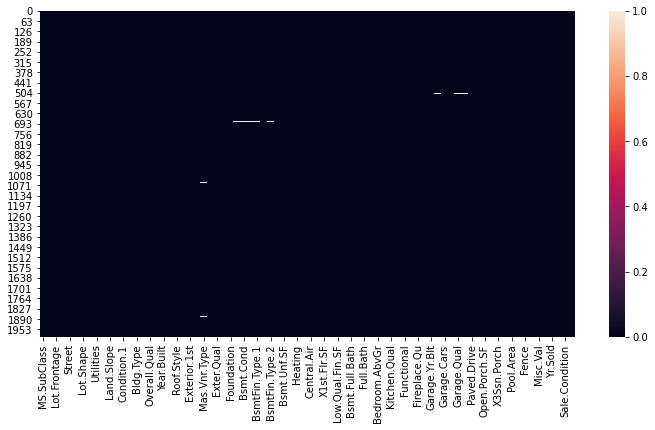

In [51]:
#Wyświetl braki w danych za pomocą heatmap (technika wizualizacji danych, która pokazuje wielkość zjawiska w postaci koloru w dwóch wymiarach - różnice w kolorze mogą wynikać z odcienia lub intensywności, dając oczywiste wizualne wskazówki dotyczące tego, jak zjawisko jest skupione lub zmienia się w przestrzeni)
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull())
plt.show()

In [52]:
#Zamień braki w zmiennych kategorycznych na wartość 'Brak'
def replace_cat_feature(data,features_nan):
    dataset=data.copy()
    dataset[features_nan]=dataset[features_nan].fillna('Brak')
    return dataset

data=replace_cat_feature(data,features_nan)

data[features_nan].isnull().sum()

Mas.Vnr.Type      0
Bsmt.Qual         0
Bsmt.Cond         0
Bsmt.Exposure     0
BsmtFin.Type.1    0
BsmtFin.Type.2    0
Garage.Finish     0
Garage.Qual       0
Garage.Cond       0
dtype: int64

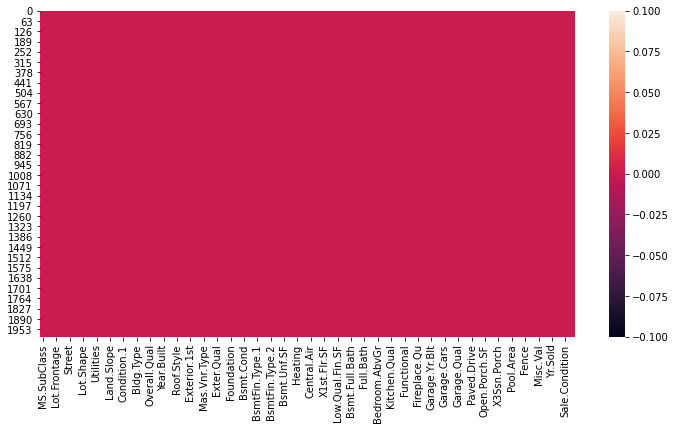

In [53]:
#Wyświetl braki w danych
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull())
plt.show()

In [54]:
#Zastąpliśmy brakujące wartości, w związku z tym powyższa wizualizacja nie pokazuje już braków w danych.

In [55]:
#W danych kategorycznych mamy również wartości którym jest przypisana wartość 'None' - niesie ona dla nas wartość biznesową - zamieńmy ją na wartość 'Brak'

In [56]:
#Dla wybranych danych kategorycznych zamień 'None' na 'Brak'
data['Alley'].replace({"None": 'Brak'}, inplace=True)
data['Mas.Vnr.Type'].replace({"None": 'Brak'}, inplace=True)
data['Bsmt.Cond'].replace({"None": 'Brak'}, inplace=True)
data['Bsmt.Exposure'].replace({"None": 'Brak'}, inplace=True)
data['BsmtFin.Type.1'].replace({"None": 'Brak'}, inplace=True)
data['BsmtFin.Type.2'].replace({"None": 'Brak'}, inplace=True)
data['Fireplace.Qu'].replace({"None": 'Brak'}, inplace=True)
data['Garage.Type'].replace({"None": 'Brak'}, inplace=True)
data['Garage.Finish'].replace({"None": 'Brak'}, inplace=True)
data['Garage.Qual'].replace({"None": 'Brak'}, inplace=True)
data['Garage.Cond'].replace({"None": 'Brak'}, inplace=True)
data['Pool.QC'].replace({"None": 'Brak'}, inplace=True)
data['Fence'].replace({"None": 'Brak'}, inplace=True)
data['Misc.Feature'].replace({"None": 'Brak'}, inplace=True)

In [57]:
#Wykonujemy to, aby wartość 'None' nie zakłamała nam wyników - lepiej będzie zmienić ją na inną wartość która daje takie samo znaczenie biznesowe.

In [58]:
#Wyświetl dane
print('Reprezentacja danych:')
data.head()

Reprezentacja danych:


,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,1302,0,0,1302,1,0,1,1,1,1,Gd,5,Typ,1,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,110,50,0,0,0,0,Brak,Brak,Brak,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,Brak,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,Brak,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,Brak,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,Brak,MnPrv,Brak,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,8,1972,2003,Gable,CompShg,WdShing,HdBoard,Brak,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,768,0,0,768,0,1,1,0,2,1,TA,5,Typ,0,Brak,Detchd,1974,Fin,1,396,TA,TA,Y,192,0,0,0,0,0,Brak,MnPrv,Brak,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,Brak,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Brak,0,TA,TA,Slab,None,Brak,Brak,Brak,0,Brak,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Brak,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,Brak,Brak,Brak,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,Brak,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,1249,1347,0,2596,0,0,3,1,4,1,Gd,9,Typ,0,Brak,Attchd,2006,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,Brak,Brak,Brak,0,9,2006,New,Partial,342643


In [59]:
#Dane zostały poprawnie zamienione - np. w kategorii 'Alley' widać już nowe przypisanie

In [60]:
#Wyświetl braki w kategoriach numerycznych
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum() and data[feature].dtypes!='object']
numerical_with_nan

[]

In [61]:
#W kategoriach numerycznych nie występują braki w danych.

In [62]:
#Logarytmuj wcześniej wyodrębione kategorie
num_features=['Lot.Area', 'X1st.Flr.SF', 'Gr.Liv.Area', 'SalePrice']

for feature in num_features:
    data[feature]=np.log(data[feature])

In [63]:
#Wyświetl dane
print('Reprezentacja danych:')
data.head()

Reprezentacja danych:


,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,8.268988,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,7.171657,0,0,7.171657,1,0,1,1,1,1,Gd,5,Typ,1,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,110,50,0,0,0,0,Brak,Brak,Brak,0,8,2007,New,Partial,12.225875
1,20,RL,70,9.035987,Pave,Brak,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,Brak,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,6.782192,0,0,6.782192,1,0,1,0,2,1,TA,4,Typ,0,Brak,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,Brak,MnPrv,Brak,0,4,2010,WD,Normal,11.744037
2,85,RL,60,8.881836,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,8,1972,2003,Gable,CompShg,WdShing,HdBoard,Brak,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,6.643790,0,0,6.643790,0,1,1,0,2,1,TA,5,Typ,0,Brak,Detchd,1974,Fin,1,396,TA,TA,Y,192,0,0,0,0,0,Brak,MnPrv,Brak,0,4,2009,WD,Normal,11.804849
3,90,RL,64,8.856234,Pave,Brak,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Brak,0,TA,TA,Slab,None,Brak,Brak,Brak,0,Brak,0,0,0,GasA,TA,Y,SBrkr,7.336286,0,0,7.336286,0,0,2,0,4,2,TA,8,Typ,0,Brak,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,Brak,Brak,Brak,0,6,2009,WD,Alloca,11.685685
4,60,RL,111,9.696402,Pave,Brak,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,7.130099,1347,0,7.861727,0,0,3,1,4,1,Gd,9,Typ,0,Brak,Attchd,2006,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,Brak,Brak,Brak,0,9,2006,New,Partial,12.744444


c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\basia\appdata\local\programs\pyth

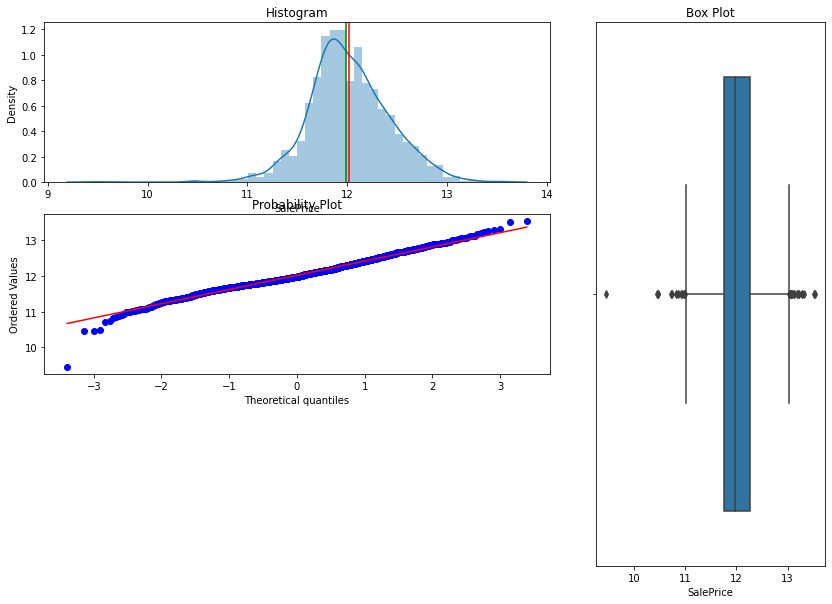

In [64]:
#Wyświel histogram, boxplt i probability plot
def three_chart_plot(data, feature):
    fig = plt.figure(constrained_layout = True, figsize = (14, 10))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(data.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = data[feature].mean(), c = 'red')
    plt.axvline(x = data[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(data.loc[:,feature], plot = ax2)

   
    ax3 = fig.add_subplot(grid[:, 2]) 
    ax3.set_title('Box Plot')
    sns.boxplot(data.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(data, 'SalePrice')

In [65]:
#Widać, że odchylenia zostały zminimalizowane.

In [66]:
#Zastąp cechy kategoryczne mające mniej niż 1% rzadkich wartości nową etykietą 'Rare_val'
for feature in categorical_features:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

In [67]:
#Wyświetl dane
print('Reprezentacja danych:')
data.head(100)

Reprezentacja danych:


,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,8.268988,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,7.171657,0,0,7.171657,1,0,1,1,1,1,Gd,5,Typ,1,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,110,50,0,0,0,0,Brak,Brak,Brak,0,8,2007,New,Partial,12.225875
1,20,RL,70,9.035987,Pave,Brak,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,Brak,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,6.782192,0,0,6.782192,1,0,1,0,2,1,TA,4,Typ,0,Brak,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,Brak,MnPrv,Brak,0,4,2010,WD,Normal,11.744037
2,85,RL,60,8.881836,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,8,1972,2003,Gable,CompShg,WdShing,HdBoard,Brak,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,6.643790,0,0,6.643790,0,1,1,0,2,1,TA,5,Typ,0,Brak,Detchd,1974,Fin,1,396,TA,TA,Y,192,0,0,0,0,0,Brak,MnPrv,Brak,0,4,2009,WD,Normal,11.804849
3,90,RL,64,8.856234,Pave,Brak,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Brak,0,TA,TA,Slab,None,Brak,Brak,Brak,0,Brak,0,0,0,GasA,TA,Y,SBrkr,7.336286,0,0,7.336286,0,0,2,0,4,2,TA,8,Typ,0,Brak,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,Brak,Brak,Brak,0,6,2009,WD,Alloca,11.685685
4,60,RL,111,9.696402,Pave,Brak,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,7.130099,1347,0,7.861727,0,0,3,1,4,1,Gd,9,Typ,0,Brak,Attchd,2006,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,Brak,Brak,Brak,0,9,2006,New,Partial,12.744444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50,RL,50,9.143132,Pave,Brak,Reg,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,6,1947,1979,Gable,CompShg,WdShing,Wd Shng,Brak,0,TA,TA,CBlock,TA,Fa,No,LwQ,192,Unf,0,564,756,GasA,Ex,Y,SBrkr,7.063904,0,362,7.333676,0,0,1,0,3,1,TA,8,Typ,1,TA,Detchd,1947,Unf,1,209,Fa,TA,Y,0,0,0,0,0,0,Brak,MnPrv,Brak,0,6,2010,WD,Normal,11.751942
96,20,RL,67,9.024974,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,6,1963,1963,Gable,CompShg,VinylSd,VinylSd,Stone,20,TA,Gd,CBlock,TA,TA,No,BLQ,132,LwQ,841,115,1088,GasA,TA,Y,SBrkr,6.992096,0,0,6.992096,0,0,1,0,2,1,TA,4,Typ,0,Brak,Detchd,2002,Unf,2,520,TA,TA,P,0,0,0,0,0,0,Brak,Brak,Brak,0,6,2007,COD,Normal,11.608236
97,50,RL,60,8.699515,Pave,Brak,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,Brak,0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Ex,Y,SBrkr,6.915723,0,514,7.327781,0,0,2,0,4,1,TA,7,Typ,0,Brak,Brak,0,Brak,0,0,Brak,Brak,P,0,0,138,0,0,0,Brak,Brak,Brak,0,6,2006,WD,Normal,11.532728
98,160,FV,24,7.852439,Pave,Brak

In [68]:
#Zastosuj kodowanie danych kategorycznych
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [69]:
#Wyświetl dane
print('Reprezentacja danych:')
data.head(10)

Reprezentacja danych:


,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,2,34,8.268988,1,1,0,1,0,1,0,19,3,1,1,3,6,5,2005,2006,1,0,10,10,3,182,2,2,4,4,3,3,5,866,4,0,436,1302,1,4,1,3,7.171657,0,0,7.171657,1,0,1,1,1,1,2,5,4,1,4,4,2005,2,2,631,2,3,2,110,50,0,0,0,0,0,4,1,0,8,2007,3,5,12.225875
1,20,2,70,9.035987,1,1,0,1,0,2,0,7,3,1,3,3,4,5,1970,1970,1,0,7,6,1,0,1,2,3,3,3,1,5,804,2,78,0,882,1,2,1,3,6.782192,0,0,6.782192,1,0,1,0,2,1,1,4,4,0,0,4,1970,3,2,525,2,3,2,240,0,0,0,0,0,0,2,1,0,4,2010,2,4,11.744037
2,85,2,60,8.881836,1,1,0,1,0,1,0,13,3,1,3,2,5,8,1972,2003,1,0,5,7,1,0,1,1,3,4,3,3,6,660,4,0,108,768,1,3,1,3,6.643790,0,0,6.643790,0,1,1,0,2,1,1,5,4,0,0,2,1974,3,1,396,2,3,2,192,0,0,0,0,0,0,2,1,0,4,2009,2,4,11.804849
3,90,2,64,8.856234,1,1,0,0,0,1,0,10,3,1,2,3,5,5,1979,1979,1,0,7,6,1,0,1,2,0,1,0,0,0,0,0,0,0,0,1,2,1,3,7.336286,0,0,7.336286,0,0,2,0,4,2,1,8,4,0,0,4,1979,1,2,400,2,3,2,0,0,0,0,0,0,0,4,1,0,6,2009,2,2,11.685685
4,60,2,111,9.696402,1,1,0,1,0,2,0,19,3,1,3,5,9,5,2006,2006,1,0,10,10,3,370,1,2,4,5,4,3,4,0,4,0,1249,1249,1,4,1,3,7.130099,1347,0,7.861727,0,0,3,1,4,1,2,9,4,0,0,4,2006,2,3,840,2,3,2,240,154,0,0,0,0,0,4,1,0,9,2006,3,5,12.744444
5,20,2,50,8.361708,1,1,1,1,0,1,0,6,3,1,3,3,4,9,1946,2001,1,0,4,3,1,0,1,1,3,2,3,1,4,0,4,0,560,560,1,4,1,2,6.556778,0,0,6.556778,0,1,1,0,2,1,0,4,4,0,0,1,1946,1,1,220,2,3,2,0,0,24,0,0,0,0,4,1,0,9,2009,2,4,11.393579
6,20,2,155,9.906682,1,1,1,2,0,1,1,15,3,1,3,3,8,6,1976,1976,0,1,3,2,1,0,2,2,3,4,4,4,3,51,6,915,0,966,1,4,1,3,7.463363,0,0,7.463363,2,0,0,1,0,1,2,5,4,2,2,4,1976,3,2,529,2,3,2,646,0,0,0,0,0,0,4,1,0,5,2007,2,4,12.538967
7,20,1,60,8.881836,1,0,0,1,0,1,0,2,3,1,3,3,4,5,1950,1950,1,0,4,3,1,0,1,2,3,3,3,1,4,0,4,0,576,576,1,4,1,3,6.761573,0,0,6.761573,0,0,1,0,2,1,1,5,4,0,0,2,1952,2,1,528,2,3,2,0,0,0,0,115,0,0,4,1,0,8,2006,0,4,11.561716
8,20,2,70,9.116030,1,1,0,1,0,1,0,13,3,1,3,3,7,5,2000,2000,1,0,10,10,2,244,2,2,4,4,3,3,6,1400,4,0,125,1525,1,4,1,3,7.329750,0,0,7.329750,1,0,2,0,3,1,2,6,4,0,0,4,2000,2,2,541,2,3,2,219,36,0,0,0,0,0,4,1,0,9,2006,2,4,12.367341
9,70,0,0,8.771680,1,1,1,1,0,1,0,5,3,1,3,5,4,1,1907,1950,0,0,3,1,1,0,1,2,3,3,3,1,1,73,4,0,634,707,0,2,0,3,6.848005,942,0,7.541152,0,0,1,1,4,1,1,7,4,0,0,0,0,0,0,0,0,1,0,0,0,239,0,0,0,0,4,1,0,3,2010,2,1,11.444315


In [70]:
#Wyświetl ilość przeskalowanych zmiennych
scaling_feature=[feature for feature in data.columns if feature not in ['SalePrice']]
len(scaling_feature)

79

In [71]:
#Wyświetl scaling_feature
scaling_feature

['MS.SubClass',
 'MS.Zoning',
 'Lot.Frontage',
 'Lot.Area',
 'Street',
 'Alley',
 'Lot.Shape',
 'Land.Contour',
 'Utilities',
 'Lot.Config',
 'Land.Slope',
 'Neighborhood',
 'Condition.1',
 'Condition.2',
 'Bldg.Type',
 'House.Style',
 'Overall.Qual',
 'Overall.Cond',
 'Year.Built',
 'Year.Remod.Add',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',
 'Mas.Vnr.Type',
 'Mas.Vnr.Area',
 'Exter.Qual',
 'Exter.Cond',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.SF.1',
 'BsmtFin.Type.2',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'Heating',
 'Heating.QC',
 'Central.Air',
 'Electrical',
 'X1st.Flr.SF',
 'X2nd.Flr.SF',
 'Low.Qual.Fin.SF',
 'Gr.Liv.Area',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Full.Bath',
 'Half.Bath',
 'Bedroom.AbvGr',
 'Kitchen.AbvGr',
 'Kitchen.Qual',
 'TotRms.AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace.Qu',
 'Garage.Type',
 'Garage.Yr.Blt',
 'Garage.Finish',
 'Garage.Cars',
 'Garage.Area',
 'Garage.

In [72]:
#Zastosuj MinMaxScaler() - (Przetwórz dane na potrzeby uczenia maszynowego)
feature_scale=[feature for feature in data.columns if feature not in ['SalePrice']]
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler()

In [73]:
#MinMaxScaler odejmuje minimalną wartość funkcji, a następnie dzieli przez zakres. Zakres jest różnicą między pierwotnym maksimum a oryginalnym minimum.
#MinMaxScaler zachowuje kształt oryginalnej dystrybucji. Nie zmienia znacząco informacji zawartych w oryginalnych danych.

In [74]:
#Wyświetl przeskalowane dane
scaler.transform(data[feature_scale])

array([[0.58823529, 0.66666667, 0.1086262 , ..., 0.25      , 1.        ,
        1.        ],
       [0.        , 0.66666667, 0.22364217, ..., 1.        , 0.66666667,
        0.8       ],
       [0.38235294, 0.66666667, 0.19169329, ..., 0.75      , 0.66666667,
        0.8       ],
       ...,
       [0.23529412, 0.66666667, 0.2428115 , ..., 1.        , 0.66666667,
        0.8       ],
       [0.38235294, 0.66666667, 0.        , ..., 0.75      , 0.66666667,
        0.8       ],
       [0.82352941, 1.        , 0.1086262 , ..., 0.75      , 0.66666667,
        0.8       ]])

In [75]:
#Przekształć dane i dodaj zmienną SalePrice
dataset = pd.concat([data[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [76]:
#Wyświetl dane
print('Reprezentacja danych:')
dataset.head()

Reprezentacja danych:


,SalePrice,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,12.225875,0.588235,0.666667,0.108626,0.215068,1.0,0.5,0.0,0.333333,0.0,0.25,0.0,0.95,0.6,1.0,0.25,0.6,0.555556,0.500,0.963768,0.933333,0.5,0.0,1.0,1.0,1.000000,0.11375,0.666667,0.666667,1.00,0.8,0.75,0.75,0.833333,0.153437,0.666667,0.000000,0.202508,0.213093,1.0,1.00,1.0,1.0,0.475639,0.0000,0.0,0.442284,0.333333,0.0,0.25,0.5,0.125,0.333333,0.666667,0.181818,1.0,0.25,0.8,0.8,0.997512,0.666667,0.4,0.424059,0.666667,1.0,1.0,0.126437,0.067385,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.636364,0.25,1.000000,1.0
1,11.744037,0.000000,0.666667,0.223642,0.365182,1.0,0.5,0.0,0.333333,0.0,0.50,0.0,0.35,0.6,1.0,0.75,0.6,0.333333,0.500,0.710145,0.333333,0.5,0.0,0.7,0.6,0.333333,0.00000,0.333333,0.666667,0.75,0.6,0.75,0.25,0.833333,0.142452,0.333333,0.051114,0.000000,0.144354,1.0,0.50,1.0,1.0,0.316336,0.0000,0.0,0.294152,0.333333,0.0,0.25,0.0,0.250,0.333333,0.333333,0.090909,1.0,0.00,0.0,0.8,0.980100,1.000000,0.4,0.352823,0.666667,1.0,1.0,0.275862,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.272727,1.00,0.666667,0.8
2,11.804849,0.382353,0.666667,0.191693,0.335012,1.0,0.5,0.0,0.333333,0.0,0.25,0.0,0.65,0.6,1.0,0.75,0.4,0.444444,0.875,0.724638,0.883333,0.5,0.0,0.5,0.7,0.333333,0.00000,0.333333,0.333333,0.75,0.8,0.75,0.75,1.000000,0.116938,0.666667,0.000000,0.050163,0.125696,1.0,0.75,1.0,1.0,0.259725,0.0000,0.0,0.241511,0.000000,0.5,0.25,0.0,0.250,0.333333,0.333333,0.181818,1.0,0.00,0.0,0.4,0.982090,1.000000,0.2,0.266129,0.666667,1.0,1.0,0.220690,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.272727,0.75,0.666667,0.8
3,11.685685,0.411765,0.666667,0.204473,0.330002,1.0,0.5,0.0,0.000000,0.0,0.25,0.0,0.50,0.6,1.0,0.50,0.6,0.444444,0.500,0.775362,0.483333,0.5,0.0,0.7,0.6,0.333333,0.00000,0.333333,0.666667,0.00,0.2,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.50,1.0,1.0,0.542978,0.0000,0.0,0.504900,0.000000,0.0,0.50,0.0,0.500,0.666667,0.333333,0.454545,1.0,0.00,0.0,0.8,0.984577,0.333333,0.4,0.268817,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.454545,0.75,0.666667,0.4
4,12.744444,0.235294,0.666667,0.354633,0.494437,1.0,0.5,0.0,0.333333,0.0,0.50,0.0,0.95,0.6,1.0,0.75,1.0,0.888889,0.500,0.971014,0.933333,0.5,0.0,1.0,1.0,1.000000,0.23125,0.333333,0.666667,1.00,1.0,1.00,0.75,0.666667,0.000000,0.666667,0.000000,0.580121,0.204419,1.0,1.00,1.0,1.0,0.458641,0.6523,0.0,0.704750,0.000000,0.0,0.75,0.5,0.500,0.333333,0.666667,0.545455,1.0,0.00,0.0,0.8,0.998010,0.666667,0.6,0.564516,0.666667,1.0,1.0,0.275862,0.207547,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.00,1.000000,1.0


In [77]:
#Sprawdź, czy nie ma braków w danych
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

In [78]:
#Sprawdź czy są wartości dążące do nieskończoności
count = np.isinf(dataset).values.sum()
print (count)

0


In [79]:
#Na koniec upewniamy się czy w naszym zbiorze nie ma na pewno żadnych brakujących wartości.

# CZĘŚĆ 3 - TESTOWANIE ROZWIĄZAŃ

In [80]:
#Podziel dane na X i y 
X = dataset.drop(['SalePrice'], axis = 1)
y = dataset['SalePrice']

In [81]:
#Użyjemy trzech modeli: LinearRegression, Ridge, BayesianRidge
# Regresja liniowa dopasowuje model liniowy ze współczynnikami w = (w1,…, wp) w celu zminimalizowania resztkowej sumy kwadratów między obserwowanymi celami w zbiorze danych a celami przewidywanymi przez przybliżenie liniowe.
# Ridge (regresja grzbietowa) to technika analizy danych regresji wielorakiej.
# BayesianRidge to podejście do regresji liniowej, w którym analizę statystyczną przeprowadza się w kontekście wnioskowania bayesowskiego.

In [82]:
#Funkcja do sprawdzania krzyżowego wydajności modelu
#Odchylenie powinno zbliżać się do zera 
#Miara błędu powinna zbliżać się do 1

#Tablica z wynikami
tabela_wyników=[]


def wyniki_sk(model, X_train, y_train):
    #K-fold w naszym przypadku będzie to cv=10
    wyniki = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    
    standardowe_odchylenie = np.std(wyniki)
    wyniki = np.mean(wyniki)
    
    print ("Standardowe odchylenie to:" + str(standardowe_odchylenie))
    print ("Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  \n"+ "R2: " + str(wyniki))
    

In [83]:
#Funkcja pozwalająca na wyświetlenie różnic pomiędzy cenami rzeczywistymi a cenami przewidywanymi
def reprezentuj_graficznie (model,X_test, y_test, nazwa_metody):
    
        y_pred_model = model.predict(X_test)
        plt.scatter(y_test, y_pred_model)
        plt.xlabel("Cena")
        plt.ylabel("Przewidywana cena")
        plt.title("Ceny rzeczywiste a Ceny przewidywane: "+nazwa_metody)
        plt.show()

In [84]:
def tabela_rezultaty(lm_array,rm_array,brm_array,gsrm_array):
    
    #Tablica z uśrednionymi wynikami
    mean_array =[]
    
    
    #Znajdź wartości średnie każdej tablicy i przypisz je do nowej tablicy(listy)
    
    mean_array.append(statistics.mean(lm_array))
    mean_array.append(statistics.mean(rm_array))
    mean_array.append(statistics.mean(brm_array))
    mean_array.append(statistics.mean(gsrm_array))
    
    return mean_array

In [85]:
#Funkcja pozwala na przetestowanie wydajności modeli przy uwzględnieniu tego samego zbioru testowego
#Jego wielkość jak i liczbę testów można ustanowić poza funkcją
def testuj_modele (init_test_size, liczba_testów):
    #Tablica z wynikami wydajności modelu regresji liniowej 
    lm_array = []
    #Tablica z wynikami wydajności modelu regresji Ridge 
    rm_array = []
    #Tablica z wynikami wydajności modelu regresji Bayesian Ridge
    brm_array = []
    #Tablica z wynikami wydajności modelu regresji Ridge - metoda GridSearchCV
    gsrm_array = []
    #Tablica z wynikami
    tabela=[]
   
    
    count=1
    while count <= liczba_testow:
        
        #Podziel dane na treningowe i testowe
      
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = init_test_size)
        
        
        #Użycie modelu regresji liniowej
        
        lm = LinearRegression()
        nazwa_metody="Regresja liniowa"
        #Wytrenuj model na danych treningowych  
        lm.fit(X_train, y_train)
        
        print("-" * 30 + " \n Numer testu: "+str(count)+"\n"+"-" * 30)
        #Przypisz do zmiennej wynik dokładności modelu po nałożeniu danych testowych
        lm_score=lm.score(X_test, y_test)
        
        #Sprawdź wydajność
        print("*" * 50)
        print("Wyniki wydajności zbiór treningowy "+nazwa_metody+":")
        wyniki_sk(lm, X_train, y_train)
        
        #Dodanie wyniku do tablicy
        lm_array.append(lm_score)
        
        print("Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: "+ str(rozmiar_zbioru_testowego) + " = " + str(lm_score))
        
        reprezentuj_graficznie(lm, X_test, y_test, nazwa_metody)
    
        ###########################################
        # Model regresji Ridge
    
        rm = Ridge()
        nazwa_metody="Regresja Ridge"
        rm.fit(X_train, y_train)
       
        #Przypisz do zmiennej wynik dokładności modelu po nałożeniu danych testowych
        rm_score = rm.score(X_test, y_test)
        
        #Sprawdź wydajność
        print("*" * 50)
        print("Wyniki wydajności zbiór treningowy "+nazwa_metody+":")
        wyniki_sk(rm, X_train, y_train)
        
        #Dodanie wyniku do tablicy
        rm_array.append(rm_score)
    
        print("Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: "+ str(rozmiar_zbioru_testowego) + " = " + str(rm_score))
        
        #Predykcja na danych testowych i wyświetlenie różnic pomiędzy cenami rzeczywistymi a cenami przewidywanymi
        reprezentuj_graficznie(rm, X_test, y_test, nazwa_metody)
        
        #Użycie GridSearchCV w celu ustalenia lepszych parametrów
        
        #Lista parametrów
        parametry_alpha = {'alpha':[3,2,1.9,1.8,1.6,1.5,1.4,1.3,1.2,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]}
        grid_search=GridSearchCV(rm,parametry_alpha, cv=5)
        grid_search.fit(X_train, y_train)
        print("\n\nParametry najlepszego modelu, po zastosowaniu metody GridSearchCV:\n")
        print(grid_search.best_estimator_)
        
        najlepszy_model=grid_search.best_estimator_
        
        najlepszy_model.fit(X_train,y_train)
        
        najlepszy_model_score = najlepszy_model.score(X_test, y_test)
        
        print("Dokładność modelu regresji Ridge, \n po zastosowaniu GridSearchCV \n dla zbioru testowego o wielkości: "+ str(rozmiar_zbioru_testowego) + " = " + str(najlepszy_model_score))
        
        gsrm_array.append(najlepszy_model_score)
        
        
        #########################################
        #Użycie modelu regresji Bayesian Ridge
    
        brm = BayesianRidge()
        nazwa_metody="Regresja Bayesian Ridge"
        brm.fit(X_train, y_train)
        
        #Przypisz do zmiennej wynik dokładności modelu po nałożeniu danych testowych
        brm_score = brm.score(X_test, y_test)
        
        #Sprawdź wydajność
        print("*" * 50)
        print("Wyniki wydajności zbiór treningowy"+nazwa_metody+":")
        wyniki_sk(brm, X_train, y_train)
        
        #Dodanie wyniku do tablicy
        brm_array.append(brm_score)
    
        print("Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: "+ str(rozmiar_zbioru_testowego) + " = " + str(brm_score))
        
        #Predykcja na danych testowych i wyświetlenie różnic pomiędzy cenami rzeczywistymi, a cenami przewidywanymi
        reprezentuj_graficznie(brm, X_test, y_test, nazwa_metody)
        
        
        
        count += 1
    print ("\n Zbiór wyników regresji liniowej - zbiór testowy:"+ str(init_test_size)+": \n", lm_array)
    print ("\n Zbiór wyników regresji Ridge - zbiór testowy:"+ str(init_test_size)+": \n", rm_array)
    print ("\n Zbiór wyników regresji Bayesian Ridge - zbiór testowy:"+ str(init_test_size)+": \n", brm_array)
    print ("\n Zbiór wyników metoda GridSearchCV -regresjaRidge - zbiór testowy:"+ str(init_test_size)+": \n", gsrm_array)
    
    #Podaj wyniki
    tabela=tabela_rezultaty(lm_array,rm_array,brm_array,gsrm_array)
    
    return tabela 

In [86]:
#Ustaw rozmiar zbioru testowego na 0.1 i przeprowadź 5 testów
rozmiar_zbioru_testowego=0.1
liczba_testow=5

------------------------------ 
 Numer testu: 1
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.03928545093489257
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8965661333439
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.1 = 0.9091597020758376


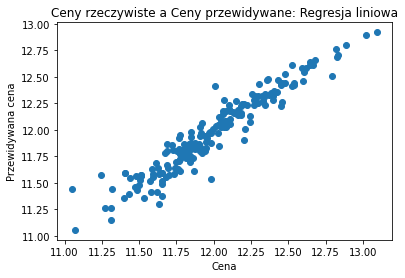

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.034550354364851404
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9013084660605383
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.1 = 0.9105524745512117


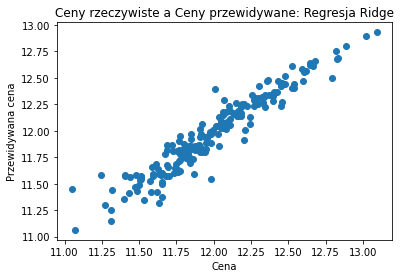



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=2)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.1 = 0.9108953678174864
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.0358379082386014
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9006380572410851
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.1 = 0.9102935738021152


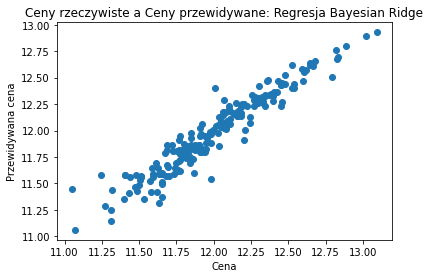

------------------------------ 
 Numer testu: 2
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.022123839506356113
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.916180730325531
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.1 = 0.7602118388050632


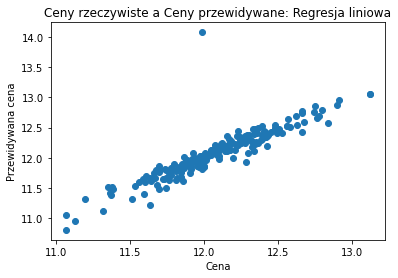

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.02281347987788612
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9171638448193548
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.1 = 0.7754629152934952


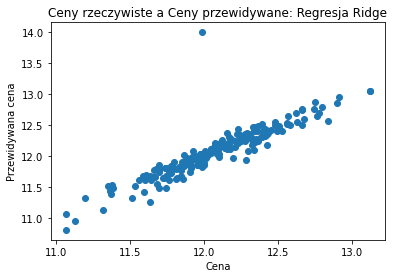



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=0.6)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.1 = 0.7697488322723365
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.022559080267641175
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9172778891684483
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.1 = 0.7690248734099381


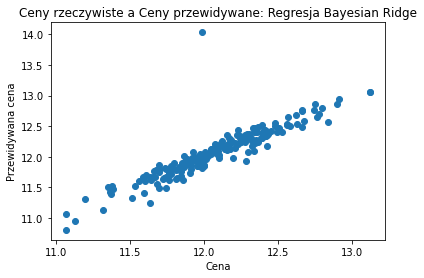

------------------------------ 
 Numer testu: 3
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.035012208392317515
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9022862168425195
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.1 = 0.886335845621785


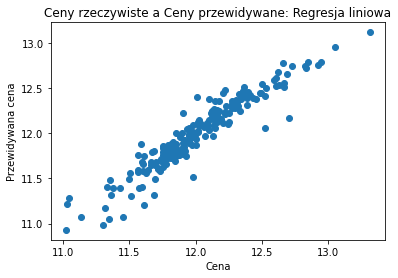

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.03412349450799504
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9044042978775437
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.1 = 0.8950754799586833


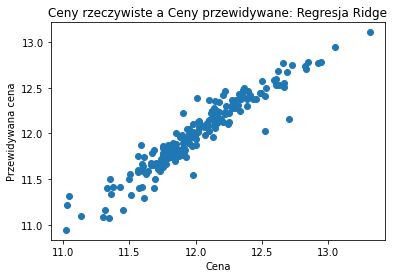



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=1.9)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.1 = 0.8994048718803009
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.03475029532910405
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9039413281484313
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.1 = 0.8922901776623162


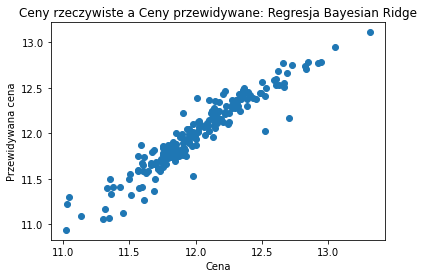

------------------------------ 
 Numer testu: 4
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.04580582547827283
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8927363249836354
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.1 = 0.9188062050300118


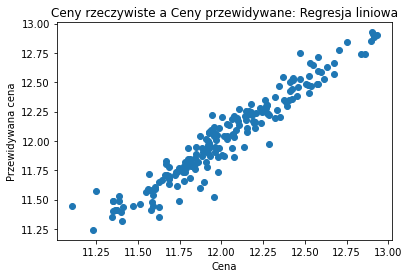

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.04237792693893255
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8991184067708232
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.1 = 0.918440240736945


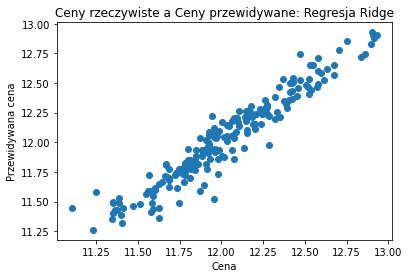



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=3)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.1 = 0.9172776283245435
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.044105396972392734
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8983176339480108
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.1 = 0.9185726764985283


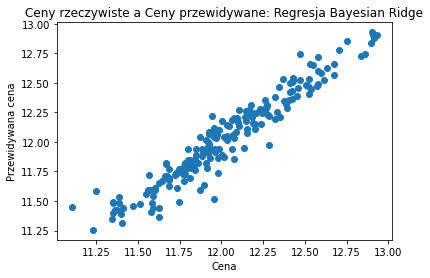

------------------------------ 
 Numer testu: 5
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.03450532356504379
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8980794988184788
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.1 = 0.9059837495641099


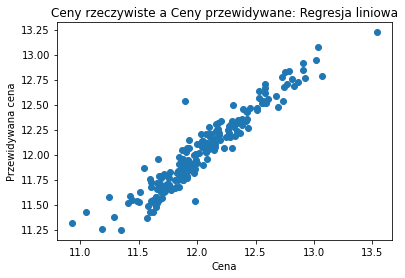

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.032180747244964926
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9030464825540309
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.1 = 0.9092078371868754


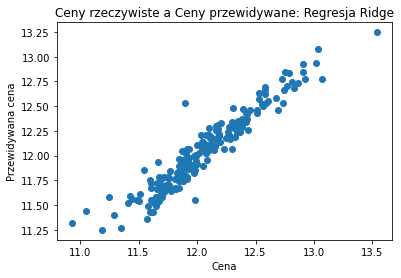



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=2)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.1 = 0.9097978558826371
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.0332095312934163
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.902480594984979
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.1 = 0.9086572649210478


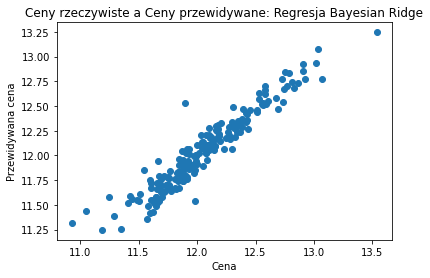


 Zbiór wyników regresji liniowej - zbiór testowy:0.1: 
 [0.9091597020758376, 0.7602118388050632, 0.886335845621785, 0.9188062050300118, 0.9059837495641099]

 Zbiór wyników regresji Ridge - zbiór testowy:0.1: 
 [0.9105524745512117, 0.7754629152934952, 0.8950754799586833, 0.918440240736945, 0.9092078371868754]

 Zbiór wyników regresji Bayesian Ridge - zbiór testowy:0.1: 
 [0.9102935738021152, 0.7690248734099381, 0.8922901776623162, 0.9185726764985283, 0.9086572649210478]

 Zbiór wyników metoda GridSearchCV -regresjaRidge - zbiór testowy:0.1: 
 [0.9108953678174864, 0.7697488322723365, 0.8994048718803009, 0.9172776283245435, 0.9097978558826371]


In [88]:
#Uruchom i wyświetl wyniki
tabela_wyników.append(testuj_modele(rozmiar_zbioru_testowego,liczba_testow))

In [89]:
#Ustaw rozmiar zbioru testowego na 0.2 i przeprowadź 5 testów
rozmiar_zbioru_testowego=0.2
liczba_testow=5

------------------------------ 
 Numer testu: 1
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.09453763450477565
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8649906593701069
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.2 = 0.9127200491030741


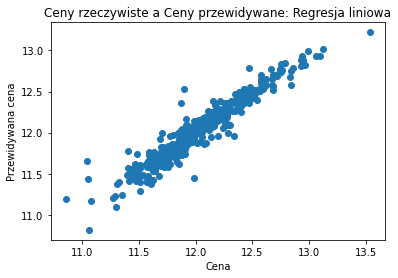

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.04506728232642783
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8960362104567132
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.2 = 0.9188369619374068


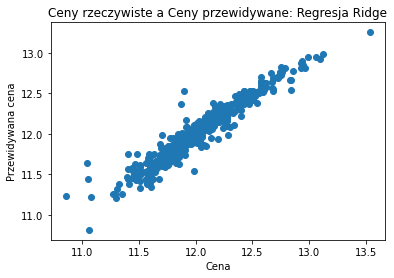



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=2)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.2 = 0.9193954845795861
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.04652181363400878
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8951137421812584
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.2 = 0.9184553989852695


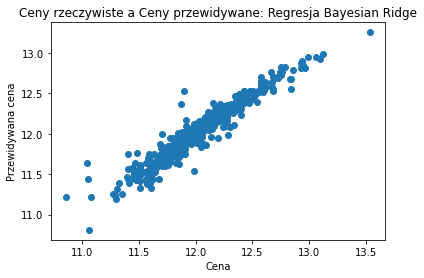

------------------------------ 
 Numer testu: 2
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.07731594039418116
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8858083426016068
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.2 = 0.8679163714250293


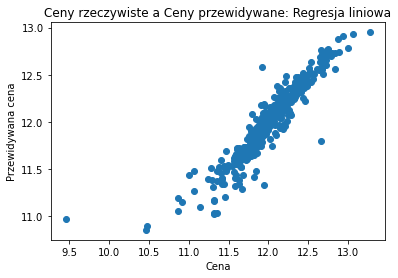

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.058551977177233705
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.9030944340635347
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.2 = 0.8812629624336586


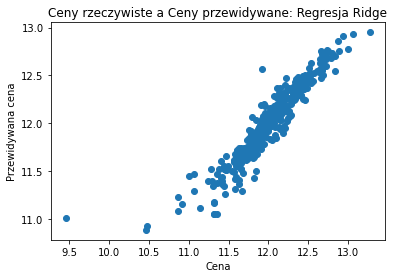



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=3)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.2 = 0.8781954236625829
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.061323999685765844
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.901945744497594
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.2 = 0.8814502089561645


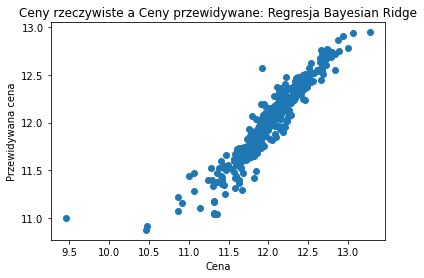

------------------------------ 
 Numer testu: 3
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.03863111516570992
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8922801967750266
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.2 = 0.9139796687169132


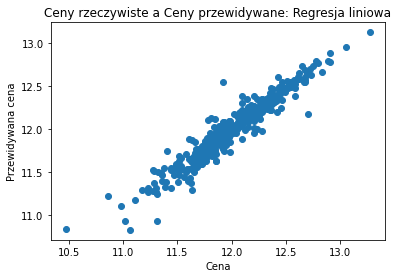

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.03846016452068972
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8970983283737579
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.2 = 0.9148333929728207


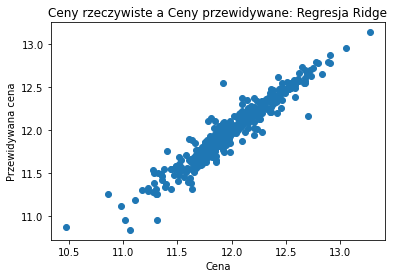



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=2)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.2 = 0.9147642112603156
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.039733222473970466
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8963672070761746
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.2 = 0.9147131530786521


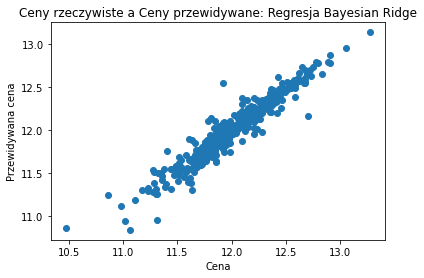

------------------------------ 
 Numer testu: 4
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.046804518635997626
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8881321138114773
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.2 = 0.9194392001623533


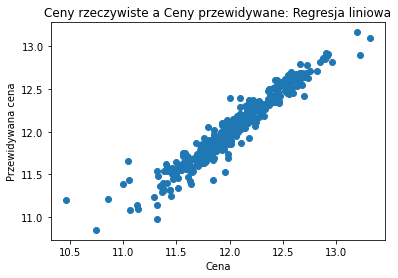

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.043070339132439094
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8973754176371864
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.2 = 0.9206104541428424


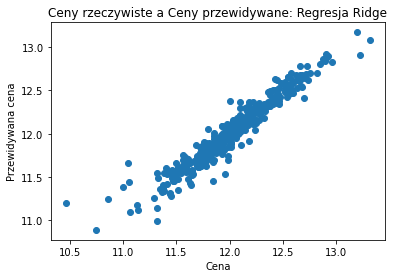



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=1.9)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.2 = 0.9205497767154093
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.04460884881300584
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8964299249790374
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.2 = 0.9204358593489377


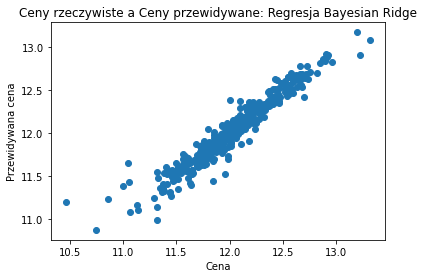

------------------------------ 
 Numer testu: 5
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.04510342698868119
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8906780863808521
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.2 = 0.9089143188570006


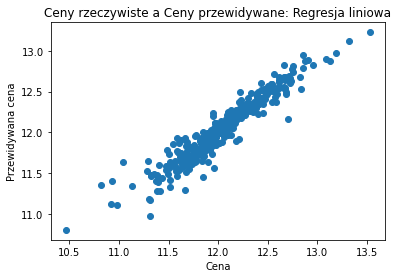

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.04043120111932979
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8988235691146679
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.2 = 0.9100978094933354


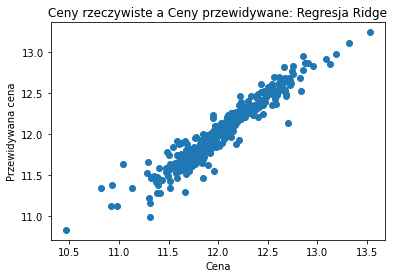



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=3)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.2 = 0.9093383235796396
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.041580448919155175
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8979982548171435
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.2 = 0.9100203613799277


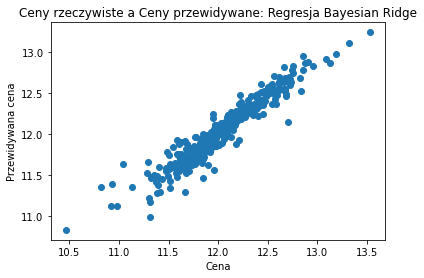


 Zbiór wyników regresji liniowej - zbiór testowy:0.2: 
 [0.9127200491030741, 0.8679163714250293, 0.9139796687169132, 0.9194392001623533, 0.9089143188570006]

 Zbiór wyników regresji Ridge - zbiór testowy:0.2: 
 [0.9188369619374068, 0.8812629624336586, 0.9148333929728207, 0.9206104541428424, 0.9100978094933354]

 Zbiór wyników regresji Bayesian Ridge - zbiór testowy:0.2: 
 [0.9184553989852695, 0.8814502089561645, 0.9147131530786521, 0.9204358593489377, 0.9100203613799277]

 Zbiór wyników metoda GridSearchCV -regresjaRidge - zbiór testowy:0.2: 
 [0.9193954845795861, 0.8781954236625829, 0.9147642112603156, 0.9205497767154093, 0.9093383235796396]


In [90]:
#Uruchom i wyświetl wyniki
tabela_wyników.append(testuj_modele(rozmiar_zbioru_testowego,liczba_testow))

In [91]:
#Ustaw rozmiar zbioru testowego na 0.3 i przeprowadź 5 testów
rozmiar_zbioru_testowego=0.3
liczba_testow=5

------------------------------ 
 Numer testu: 1
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.05910435505035227
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8792978898604341
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.3 = 0.9195618080371583


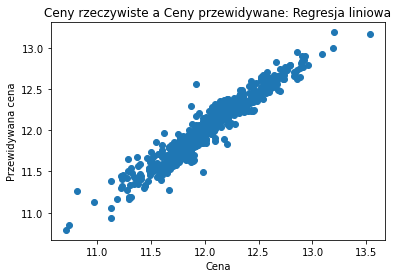

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.05173774377191323
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8873190405704724
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.3 = 0.9214408250826057


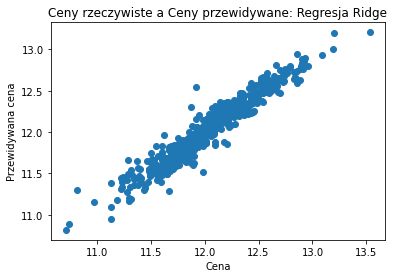



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=2)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.3 = 0.9214330220802722
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.054152068223084195
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8860822718191654
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.3 = 0.9212154337926562


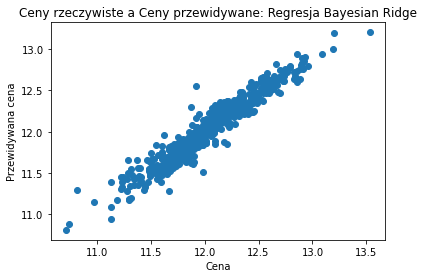

------------------------------ 
 Numer testu: 2
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.11155284538388806
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8536739239979637
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.3 = 0.9243051910881175


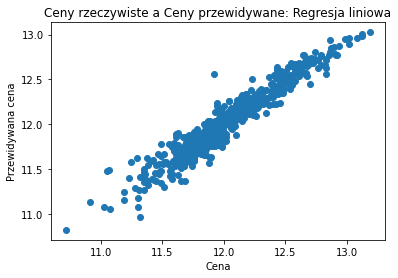

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.050859766875387874
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.892677342803253
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.3 = 0.9269421650106586


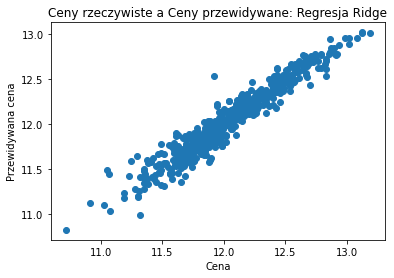



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=2)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.3 = 0.9273524333350962
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.052023491214034094
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8919014277476134
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.3 = 0.9266030106726607


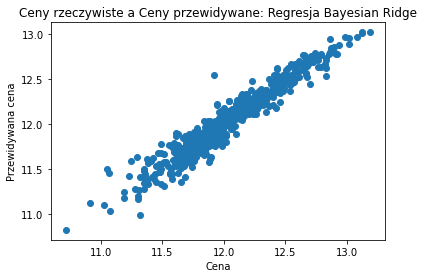

------------------------------ 
 Numer testu: 3
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.34581309847820857
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.7755564219530123
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.3 = 0.8898093255194524


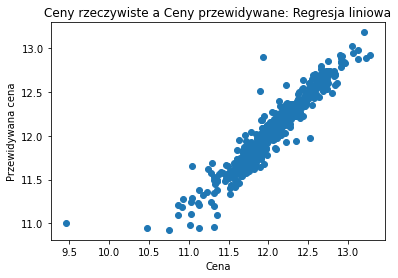

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.05194747592623482
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8959926208217478
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.3 = 0.8988620187072363


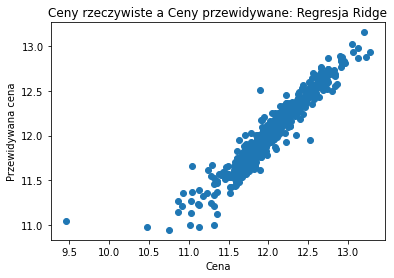



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=3)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.3 = 0.8949442460257309
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.055244335138765206
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8946512258071854
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.3 = 0.899411870349895


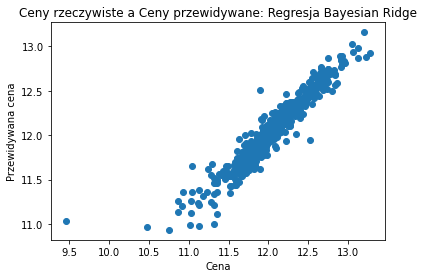

------------------------------ 
 Numer testu: 4
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.06410968668019544
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8803294018684781
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.3 = 0.9193066098349276


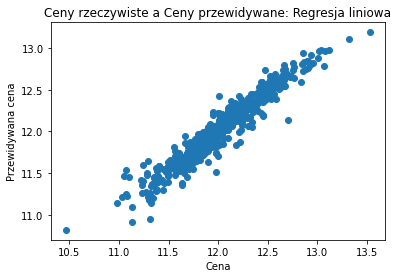

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.05464885773061849
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8885318758449683
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.3 = 0.9204688548601773


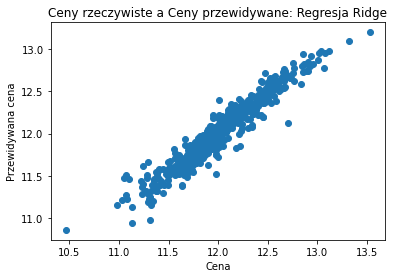



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=2)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.3 = 0.9201630147041572
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.05671125757435193
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8874904324279379
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.3 = 0.9203594362600743


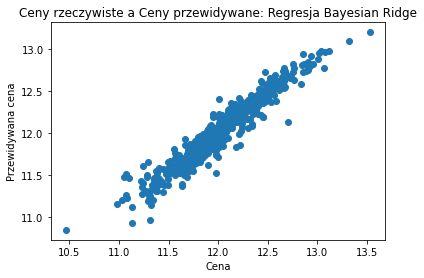

------------------------------ 
 Numer testu: 5
------------------------------
**************************************************
Wyniki wydajności zbiór treningowy Regresja liniowa:
Standardowe odchylenie to:0.06652322220727662
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.888227358150826
Dokładność modelu regresji liniowej dla zbioru testowego o wielkości: 0.3 = 0.9086761771849018


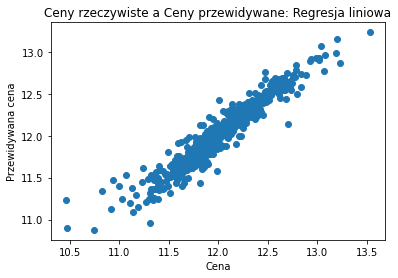

**************************************************
Wyniki wydajności zbiór treningowy Regresja Ridge:
Standardowe odchylenie to:0.06128666161597409
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8936348017570049
Dokładność modelu regresji Ridge dla zbioru testowego o wielkości: 0.3 = 0.9111244953239566


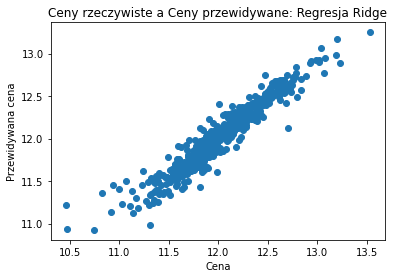



Parametry najlepszego modelu, po zastosowaniu metody GridSearchCV:

Ridge(alpha=3)
Dokładność modelu regresji Ridge, 
 po zastosowaniu GridSearchCV 
 dla zbioru testowego o wielkości: 0.3 = 0.910994976099456
**************************************************
Wyniki wydajności zbiór treningowyRegresja Bayesian Ridge:
Standardowe odchylenie to:0.06342622144947577
Uśredniona suma kwadratu błędu podzielona przez liczbę próbek  
R2: 0.8925377391762707
Dokładność modelu regresji Bayesian Ridge dla zbioru testowego o wielkości: 0.3 = 0.9107889990087473


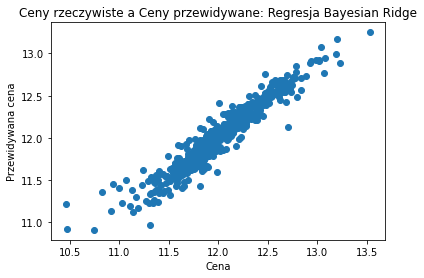


 Zbiór wyników regresji liniowej - zbiór testowy:0.3: 
 [0.9195618080371583, 0.9243051910881175, 0.8898093255194524, 0.9193066098349276, 0.9086761771849018]

 Zbiór wyników regresji Ridge - zbiór testowy:0.3: 
 [0.9214408250826057, 0.9269421650106586, 0.8988620187072363, 0.9204688548601773, 0.9111244953239566]

 Zbiór wyników regresji Bayesian Ridge - zbiór testowy:0.3: 
 [0.9212154337926562, 0.9266030106726607, 0.899411870349895, 0.9203594362600743, 0.9107889990087473]

 Zbiór wyników metoda GridSearchCV -regresjaRidge - zbiór testowy:0.3: 
 [0.9214330220802722, 0.9273524333350962, 0.8949442460257309, 0.9201630147041572, 0.910994976099456]


In [92]:
#Uruchom i wyświetl wyniki
tabela_wyników.append(testuj_modele(rozmiar_zbioru_testowego,liczba_testow))

In [93]:
#Wyświetl tablicę wyników
print (tabela_wyników)

[[0.8760994682193615, 0.8817477895454421, 0.8797677132587891, 0.8814249112354609], [0.9045939216528741, 0.9091283161960128, 0.9090149963497903, 0.9084486439595066], [0.9123318223329115, 0.9157676717969269, 0.9156757500168067, 0.9149775384489425]]


In [94]:
#Tabela_wyników=list(zip(*tabela_wyników))

In [95]:
wyniki_dataframe= pd.DataFrame.from_records(tabela_wyników)

In [96]:
#Obróć tabelę, żeby wyświetlić wyniki
tabela_wyników=np.array(tabela_wyników).T

In [97]:
wyniki_dataframe= pd.DataFrame.from_records(tabela_wyników)

In [98]:
wyniki_dataframe.columns = ['Średnia- zbiór testowy 0.1','Średnia- zbiór testowy 0.2','Średnia- zbiór testowy 0.3']

In [99]:
index=pd.Series(['Regresja Liniowa', 'Regresja Ridge', 'Regresja Bayesian Ridge', 'Metoda GridSearchCV'])
wyniki_dataframe.set_index([index])

,Średnia- zbiór testowy 0.1,Średnia- zbiór testowy 0.2,Średnia- zbiór testowy 0.3
Regresja Liniowa,0.876099,0.904594,0.912332
Regresja Ridge,0.881748,0.909128,0.915768
Regresja Bayesian Ridge,0.879768,0.909015,0.915676
Metoda GridSearchCV,0.881425,0.908449,0.914978


In [ ]:
#Najlepszy wynik otrzymaliśmy dla Regresji Ridge przy zbiorze testowym równym 0.3